### TITLE: CUSTOMER SECTIONALIZATION BASED ON INCOME AND SPENDING SCORE

#### INTRODUCTION: 

In this piece of work we segmented customers of a certain business point into groups. This project can be useful for businesses in product recommendation and advertizing. We achieved this using kmeans cluster model. we also carried out some statistical analysis into the data to extract some insight.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
range(df.index.size)

range(0, 200)

In [4]:
# check if there are null rows and columns

df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
#df['Age'].mode()
print(df.Age.median())

36.0


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#To check the unique ages

df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [9]:
#To check the age unique count

df['Age'].nunique()

51

In [10]:
#Let us categorize the age into group, we define a grouping function and apply it to the age column

def group(age):
    if age <= 18:
        return 'teenager'
    if (age > 18 and age <= 26):
        return 'young adult'
    if (age > 26 and age <= 40):
        return 'adult'
    else: #if age > 40:
        #return 'older'
        return 'older adult'
    
#apply the grouping to 'age' column

df['Age_category'] = df['Age'].apply(group)
df
    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category
0,1,Male,19,15,39,young adult
1,2,Male,21,15,81,young adult
2,3,Female,20,16,6,young adult
3,4,Female,23,16,77,young adult
4,5,Female,31,17,40,adult
...,...,...,...,...,...,...
195,196,Female,35,120,79,adult
196,197,Female,45,126,28,older adult
197,198,Male,32,126,74,adult
198,199,Male,32,137,18,adult


In [11]:
df[df['Age_category'] == 'older adult']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category
8,9,Male,64,19,3,older adult
10,11,Male,67,19,14,older adult
12,13,Female,58,20,15,older adult
18,19,Male,52,23,29,older adult
22,23,Female,46,25,5,older adult
...,...,...,...,...,...,...
184,185,Female,41,99,39,older adult
186,187,Female,54,101,24,older adult
188,189,Female,41,103,17,older adult
194,195,Female,47,120,16,older adult


In [12]:
df['Age_category'].value_counts()

adult          82
older adult    78
young adult    36
teenager        4
Name: Age_category, dtype: int64

In [13]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

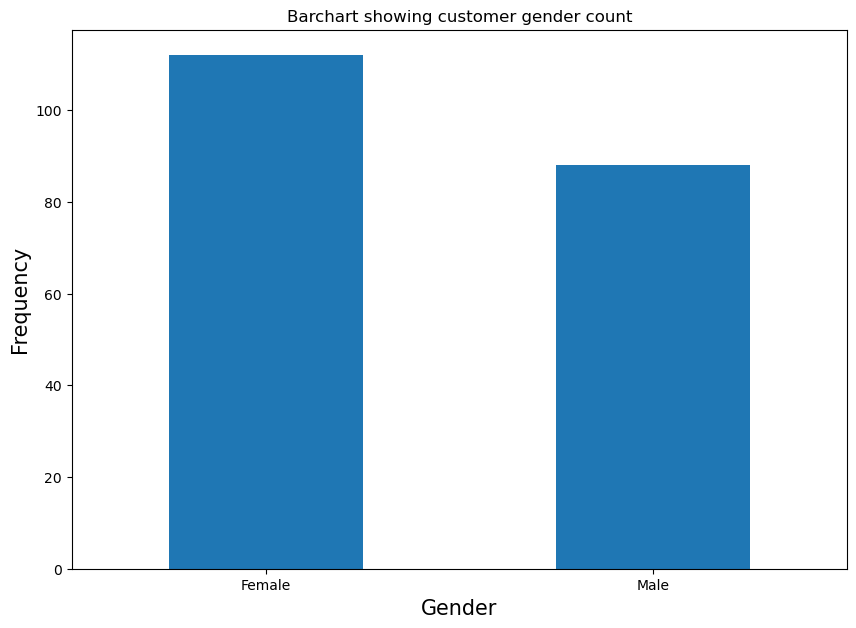

In [14]:
plt.figure(figsize=(10, 7))

df['Gender'].value_counts(normalize=False).plot.bar()

plt.title('Barchart showing customer gender count')

plt.ylabel('Frequency', fontweight=15, fontsize=15)

plt.xlabel('Gender', fontsize=15, fontweight=15)

plt.xticks(rotation=0)

plt.show()

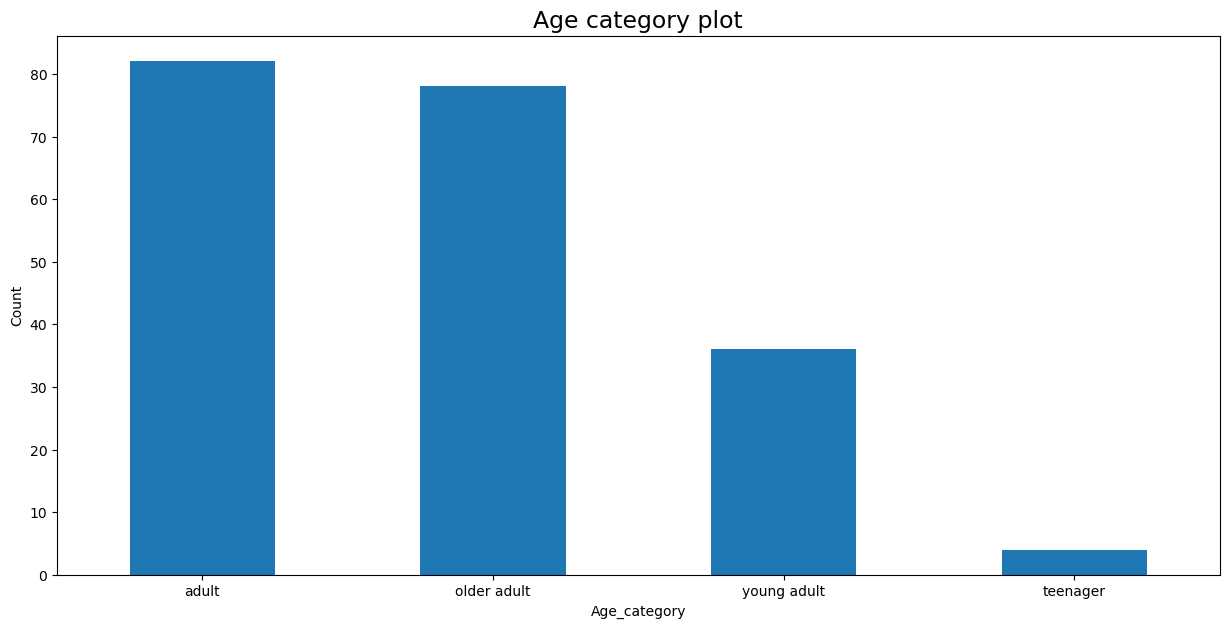

In [15]:
plt.figure(figsize=(15,7))
df['Age_category'].value_counts().plot.bar()
plt.title('Age category plot', fontsize=17)
plt.ylabel('Count')
plt.xlabel('Age_category')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Let us see how the age categories compare with gender by plot

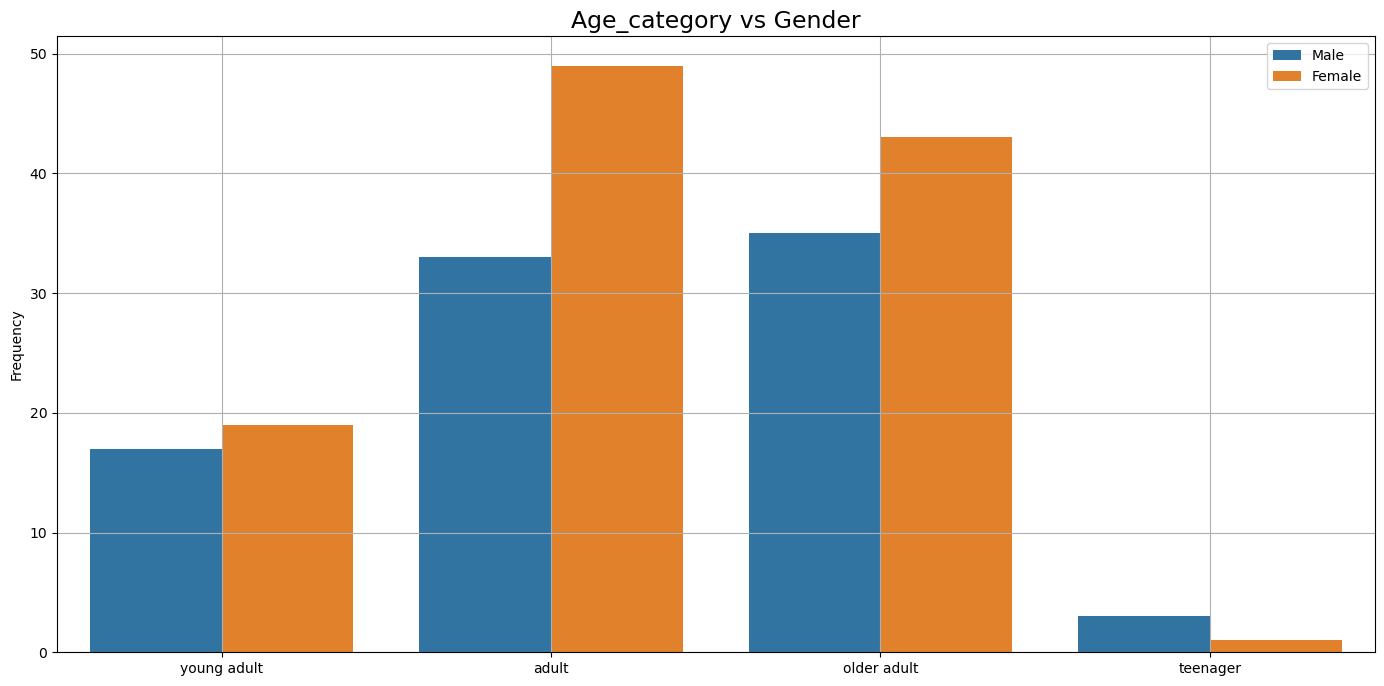

In [17]:
plt.figure(figsize=(17, 8))
sns.countplot(x=df['Age_category'].values, hue=df['Gender'].values)
plt.title('Age_category vs Gender', fontsize=17)
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Age distribution of customers

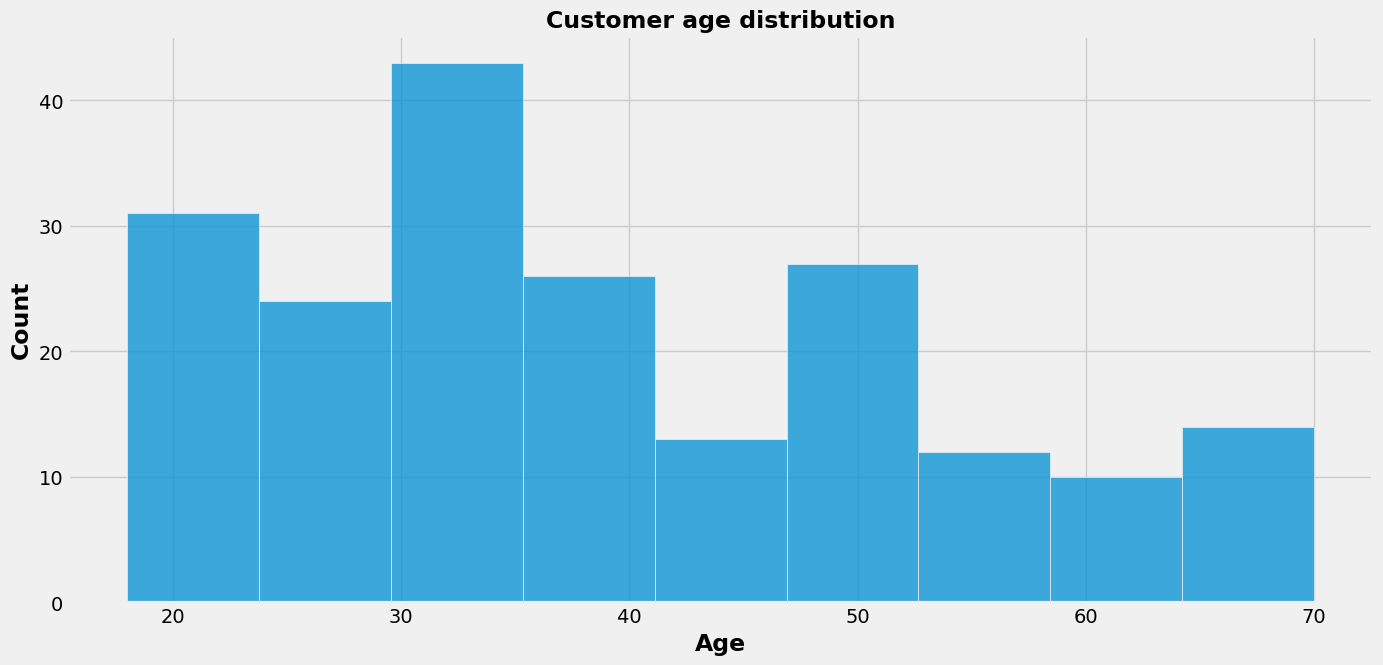

In [75]:
plt.figure(figsize=(15, 7))

sns.histplot(x=df['Age'])

plt.title('Customer age distribution', fontsize=17, fontweight='bold')

plt.xlabel('Age', fontweight='bold', fontsize=17)

plt.ylabel('Count', fontweight='bold', fontsize=17)

plt.show()

In [19]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

### Categorize the annual income column

In [20]:
df.loc[df['Annual Income (k$)'] <= 30, 'Income_group'] = 'Low income class'
df.loc[df['Annual Income (k$)'].between(31, 50), 'Income_group'] = 'Middle class'
df.loc[df['Annual Income (k$)'].between(51, 80), 'Income_group'] = 'Upper middle class'
df.loc[df['Annual Income (k$)'] > 81, 'Income_group'] = 'High income class'
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category,Income_group
0,1,Male,19,15,39,young adult,Low income class
1,2,Male,21,15,81,young adult,Low income class
2,3,Female,20,16,6,young adult,Low income class
3,4,Female,23,16,77,young adult,Low income class
4,5,Female,31,17,40,adult,Low income class


In [21]:
df['CustomerID'].sort_index().value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64

In [22]:
def spend_mapping(spend):
    if spend <= 49:
        return '0'
    else:
        return '1'
    
df['Categ_annual_income'] = df['Spending Score (1-100)'].map(spend_mapping)  # or apply(spend_mapping)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category,Income_group,Categ_annual_income
0,1,Male,19,15,39,young adult,Low income class,0
1,2,Male,21,15,81,young adult,Low income class,1
2,3,Female,20,16,6,young adult,Low income class,0
3,4,Female,23,16,77,young adult,Low income class,1
4,5,Female,31,17,40,adult,Low income class,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,adult,High income class,1
196,197,Female,45,126,28,older adult,High income class,0
197,198,Male,32,126,74,adult,High income class,1
198,199,Male,32,137,18,adult,High income class,0


In [23]:
df[['Spending Score (1-100)', 'Categ_annual_income']]

,Spending Score (1-100),Categ_annual_income
0,39,0
1,81,1
2,6,0
3,77,1
4,40,0
...,...,...
195,79,1
196,28,0
197,74,1
198,18,0


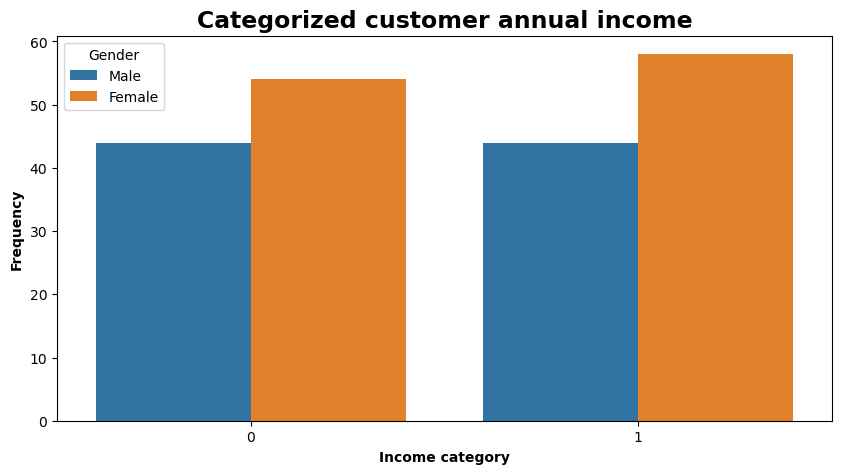

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Categ_annual_income'].values, hue=df['Gender'])
plt.title('Categorized customer annual income',fontsize=17, fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xlabel('Income category', fontweight='bold')
plt.show()

In [25]:
df[['Categ_annual_income', 'Gender']].value_counts()

Categ_annual_income  Gender
1                    Female    58
0                    Female    54
                     Male      44
1                    Male      44
dtype: int64

In [26]:
correlation = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
correlation.style.background_gradient(axis=1)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [27]:
# Let us assume that customers with spending score less than 50 are regarded as credit fearful or likely to be declined credit
# Then we can filter out these category as follows;

In [28]:
credit_fearful = df[df['Categ_annual_income'] == '0']
print('Credit fearful:', credit_fearful.shape)
credit_fearful

Credit fearful: (98, 8)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category,Income_group,Categ_annual_income
0,1,Male,19,15,39,young adult,Low income class,0
2,3,Female,20,16,6,young adult,Low income class,0
4,5,Female,31,17,40,adult,Low income class,0
6,7,Female,35,18,6,adult,Low income class,0
8,9,Male,64,19,3,older adult,Low income class,0
...,...,...,...,...,...,...,...,...
190,191,Female,34,103,23,adult,High income class,0
192,193,Male,33,113,8,adult,High income class,0
194,195,Female,47,120,16,older adult,High income class,0
196,197,Female,45,126,28,older adult,High income class,0


In [29]:
#Unique count of age groups in credit fearful data

age_group = credit_fearful['Age_category'].value_counts()
print('\n age_group:', age_group)


 age_group: older adult    57
adult          27
young adult    12
teenager        2
Name: Age_category, dtype: int64


In [30]:
data = (credit_fearful[['Gender', 'Age_category']].value_counts().rename('Count').to_frame())
data

Count
Gender Age_category       
Female older adult      30
Male   older adult      27
Female adult            18
Male   adult             9
       young adult       7
Female young adult       5
       teenager          1
Male   teenager          1

In [31]:
# Let us group the gender in the credit_fearful data as 0 for female and 1 for male

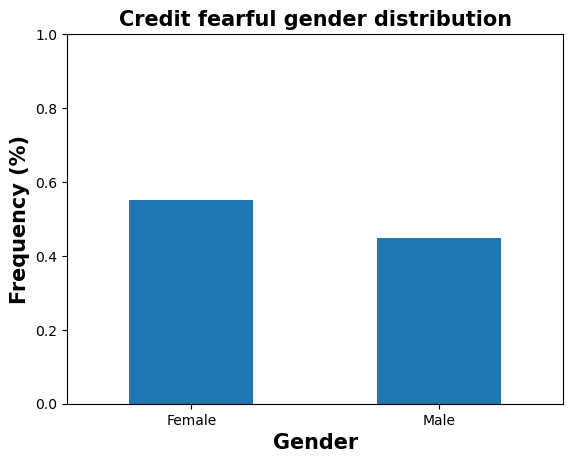

In [32]:
#gender_dict = {0 : 'Female', 1: 'Male'}

gender_grp = credit_fearful['Gender'].replace('gender_dict')
gender_count = gender_grp.value_counts(normalize=True)

gender_count.plot(kind='bar')
plt.title('Credit fearful gender distribution', fontweight='bold', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Frequency (%)', fontweight='bold', fontsize=15)
plt.xlabel('Gender', fontweight='bold', fontsize=15)
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()


In [33]:
credit_fearful['Gender'].value_counts()

Female    54
Male      44
Name: Gender, dtype: int64

The above analysis shows that women are more credit fearful than men

In [34]:
credit_fearful['Income_group'].unique()

array(['Low income class', 'Middle class', 'Upper middle class', nan,
       'High income class'], dtype=object)

In [35]:
credit_fearful

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category,Income_group,Categ_annual_income
0,1,Male,19,15,39,young adult,Low income class,0
2,3,Female,20,16,6,young adult,Low income class,0
4,5,Female,31,17,40,adult,Low income class,0
6,7,Female,35,18,6,adult,Low income class,0
8,9,Male,64,19,3,older adult,Low income class,0
...,...,...,...,...,...,...,...,...
190,191,Female,34,103,23,adult,High income class,0
192,193,Male,33,113,8,adult,High income class,0
194,195,Female,47,120,16,older adult,High income class,0
196,197,Female,45,126,28,older adult,High income class,0


In [36]:
inc_cate = {'Low income class':1,
           'Middle class': 2,
           'Upper middle class': 3,
           'High income class': 4}
df_inc_cate = (df['Income_group'].map(inc_cate).groupby(df['Categ_annual_income']).value_counts(normalize=False)
               .rename('Count').to_frame().reset_index()
              )
               
df_inc_cate

,Categ_annual_income,Income_group,Count
0,0,3.0,45
1,0,2.0,18
2,0,4.0,18
3,0,1.0,16
4,1,3.0,43
5,1,2.0,24
6,1,4.0,18
7,1,1.0,16


In [37]:
credit = df['Income_group'].groupby(df['Categ_annual_income']).value_counts(normalize=False).rename('count').to_frame().reset_index()
credit

,Categ_annual_income,Income_group,count
0,0,Upper middle class,45
1,0,High income class,18
2,0,Middle class,18
3,0,Low income class,16
4,1,Upper middle class,43
5,1,Middle class,24
6,1,High income class,18
7,1,Low income class,16


In [38]:
#Let us now visualize this using a barplot

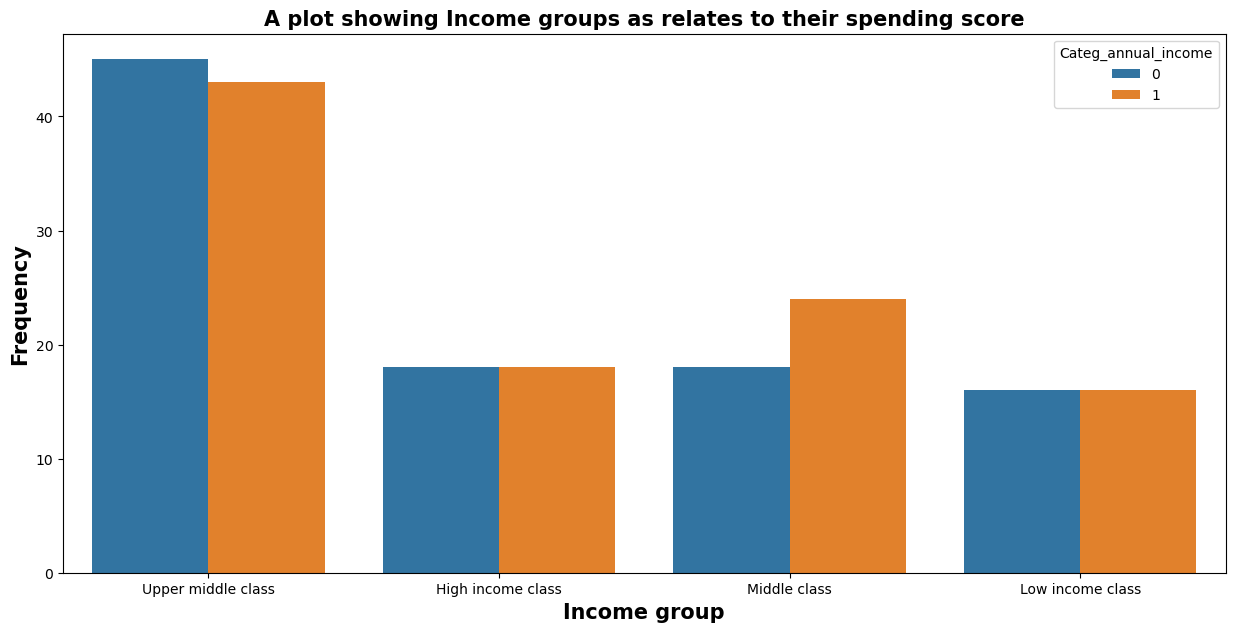

Categ_annual_income is 0 when spending score < 49 and 1 when spending score is > 49


In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x='Income_group', y='count', hue='Categ_annual_income', data=credit)
plt.title('A plot showing Income groups as relates to their spending score', fontsize=15, fontweight='bold')
plt.xlabel('Income group', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.show()
print(f'Categ_annual_income is 0 when spending score < 49 and 1 when spending score is > 49')

In [40]:
credit_fearful.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_category,Income_group,Categ_annual_income
0,1,Male,19,15,39,young adult,Low income class,0
2,3,Female,20,16,6,young adult,Low income class,0
4,5,Female,31,17,40,adult,Low income class,0
6,7,Female,35,18,6,adult,Low income class,0
8,9,Male,64,19,3,older adult,Low income class,0


- From this analysis we see that the middle class are less credit fearful for some reasons anyone can guess.
- One can deduce that those in the middle class tend to spend more than other income groups at this particular business point or store.

### PREPROCESSING

In [41]:
X = credit_fearful[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3


In [42]:
#first we import the libraries we shall be needing for this

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Generate our features and labels

#features, true_labels = make_blobs(n_samples=98, centers=3, cluster_std=2.75, random_state=None)

#print(features[:5], '\n')

#print(true_labels[:5])


In [43]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=None) #we can also set the random state to 42 which is the best practice.
kmeans.fit(X)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10)

So we in the above code we have 38 datapoints spread accross 3 clusters

In [44]:
#We now want to to obtain the labels that the clusters have assigned  to the data points, usually stored in a one
#dimensional NumPy array.

labels = kmeans.labels_
labels[:5]

array([0, 0, 0, 0, 0])

### Let us now visualize these clusters

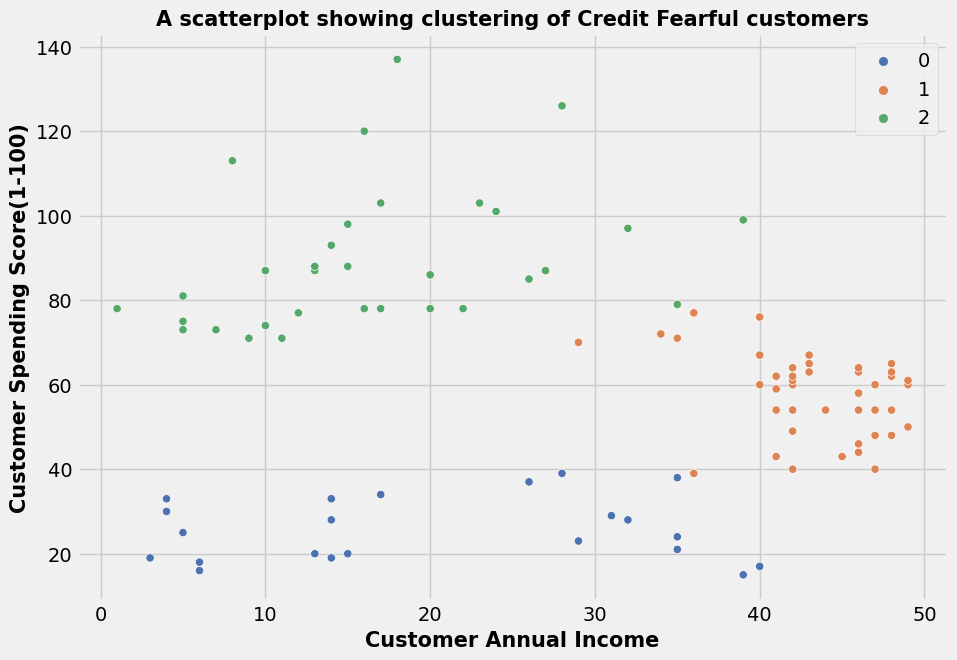

In [73]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x='Spending Score (1-100)',
               y = 'Annual Income (k$)',
               data=credit_fearful,
               hue=labels,palette='deep')
plt.xlabel('Customer Annual Income', fontweight='bold', fontsize=15)
plt.ylabel('Customer Spending Score(1-100)', fontweight='bold', fontsize=15)
plt.title('A scatterplot showing clustering of Credit Fearful customers', fontweight='bold', fontsize=15)
plt.show()

### We next want to determine the centroids that our model created during training and assign them to a variable.

In [46]:
centroids = kmeans.cluster_centers_
centroids

array([[25.72727273, 20.22727273],
       [57.34883721, 43.23255814],
       [89.09090909, 16.18181818]])

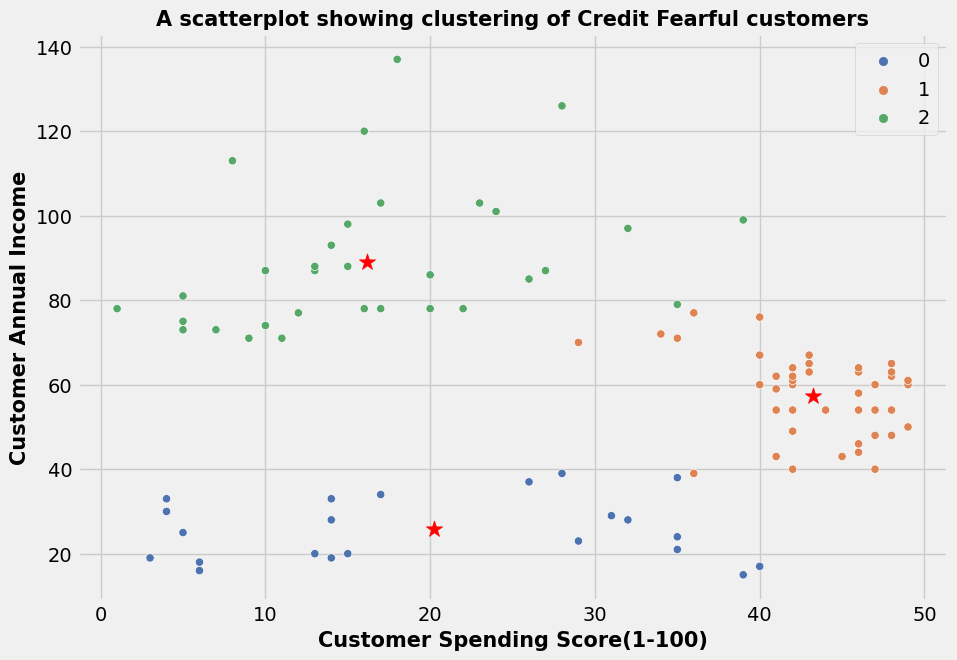

In [74]:
# Let us include these centroids to our graph 
#first we import the libraries we shall be needing for this

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10, 7))

sns.scatterplot(x='Spending Score (1-100)',
               y = 'Annual Income (k$)',
               data=credit_fearful,
               hue=labels, palette="deep")

plt.scatter(y=centroids[:, 0],
           x=centroids[:, 1],
           color="red",
           marker= "*",
           s=150)
plt.ylabel('Customer Annual Income', fontweight='bold', fontsize=15)
plt.xlabel('Customer Spending Score(1-100)', fontweight='bold', fontsize=15)
plt.title('A scatterplot showing clustering of Credit Fearful customers', fontweight='bold', fontsize=15)
plt.show()

In [48]:
#To find the lowet SSE value

kmeans.inertia_

21267.305496828754

The optimal inertia_ is 0 but we can see that our inertia is way more than 0, this is because the annual income was measured in thousands. It doesn't invalidate our model.

In [49]:
#To find the locations of the centroids

kmeans.cluster_centers_ #The centroids

array([[25.72727273, 20.22727273],
       [57.34883721, 43.23255814],
       [89.09090909, 16.18181818]])

In [50]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [51]:
#Let's get the silhouette score, the optimal silhouette score is 1.

silh_score = silhouette_score(X, kmeans.labels_)
print('Silhouette_score for 3 clusters:', silh_score)

Silhouette_score for 3 clusters: 0.544788992602772


This points that our may not be perfect, silhouette coefficient values range between -1 and 1, Our model though may not be best but still within range.

### Next, we want to determine if we chose the appropriate number of clusters

In [52]:
#Let us loop through values k again, we will do this using the Elbow using inertia i.e SSE(Sum of Squares Error) and Silhouette method

#Create a list to hold the inertia and silhouette coefficients for each k
#n_clusters = (2, 11)

inertia_coef = []
silhouette_coef = []

# we start a 2 clusters for the silhouette coefficent

for k in range (2, 11):
    # build model
    kmeans = KMeans(n_clusters=k, random_state=None)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    
    #For inertia
    
    inertia_coef.append(kmeans.inertia_)
    
    #For silhouette coefficient
    
    silhouette_coef.append(score)
    
print("Silhouette Coefficent:", silhouette_coef, '\n')
print("Inertia_coefficient:", inertia_coef)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Silhouette Coefficent: [0.49283776429486564, 0.544788992602772, 0.5308955481587203, 0.5107476654101093, 0.4859495961877138, 0.4650610392918706, 0.47272486708425615, 0.478150878405144, 0.4685866664795789] 

Inertia_coefficient: [42302.57543859648, 21267.305496828754, 14633.34580931264, 10642.006565656564, 8348.118236665296, 6563.172782119841, 5519.424175824176, 4634.724064171123, 3971.439215686275]


In [53]:
#The Elbow method entails computing the SSE or say the Inertia

kmeans_kwargs = {"init": "random", "n_init":10, "max_iter": 300, "random_state": 42}

#Create a list to hold the SSE
sse = []

#Loop through number clusters k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

print("SSE:", sse)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

SSE: [91077.4693877551, 42302.57543859648, 21267.305496828754, 14633.34580931264, 10643.460504889918, 8693.406834795322, 7209.637606837607, 6056.215873015873, 4557.949206349206, 4113.722222222223]


Now, we want to find the <b>elbow point</b> which will tell us the desired number of clusters we should use.

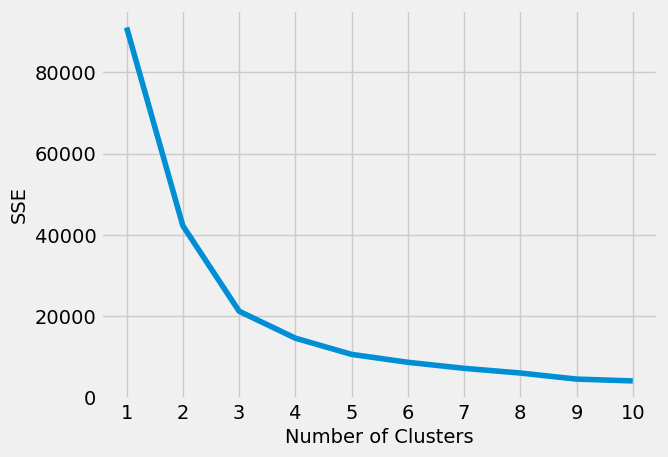

In [54]:
# We shall achieve this using a graph

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
#plt.grid(True)
plt.show()


Unsure where the Elbow point is located?

In [55]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

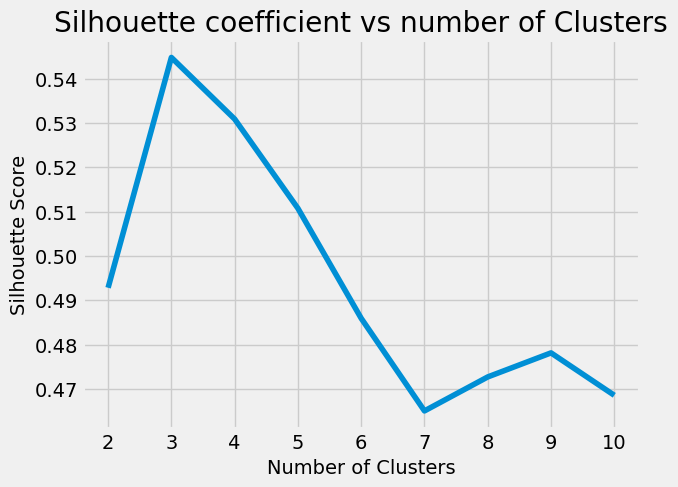

In [56]:
#Let us plot the Silhouette score vs number of clusters
plt.plot(range(2, 11), silhouette_coef)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette coefficient vs number of Clusters")
plt.grid(True)
plt.show()

In [57]:
### Let us try increase the number of clusters from 3 to 4

kmeans2 = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)
kmeans2.fit(X)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [58]:
kmeans2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [59]:
kmeans2.n_iter_

5

In [60]:
kmeans2.cluster_centers_.round(2)

array([[ 79.6 ,  15.16],
       [ 56.56,  43.76],
       [ 25.73,  20.23],
       [109.7 ,  22.  ]])

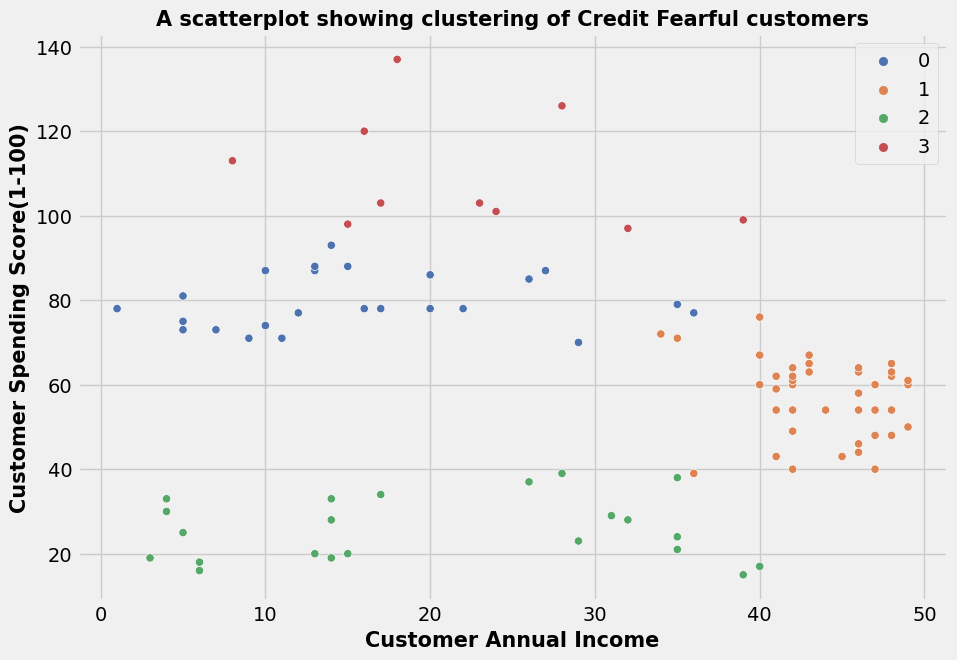

In [63]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Spending Score (1-100)',
               y = 'Annual Income (k$)',
               data=credit_fearful,
               hue=kmeans2.labels_,palette='deep')
plt.xlabel('Customer Annual Income', fontweight='bold', fontsize=15)
plt.ylabel('Customer Spending Score(1-100)', fontweight='bold', fontsize=15)
plt.title('A scatterplot showing clustering of Credit Fearful customers', fontweight='bold', fontsize=15)
plt.show()

In [64]:
#Let's display this result in a data frame

clus_df = X.groupby(kmeans2.labels_).mean().round(2)
clus_df

,Annual Income (k$),Spending Score (1-100)
0,79.60,15.16
1,56.56,43.76
2,25.73,20.23
3,109.70,22.00


In [65]:
kmeans2.cluster_centers_

array([[ 79.6       ,  15.16      ],
       [ 56.56097561,  43.75609756],
       [ 25.72727273,  20.22727273],
       [109.7       ,  22.        ]])

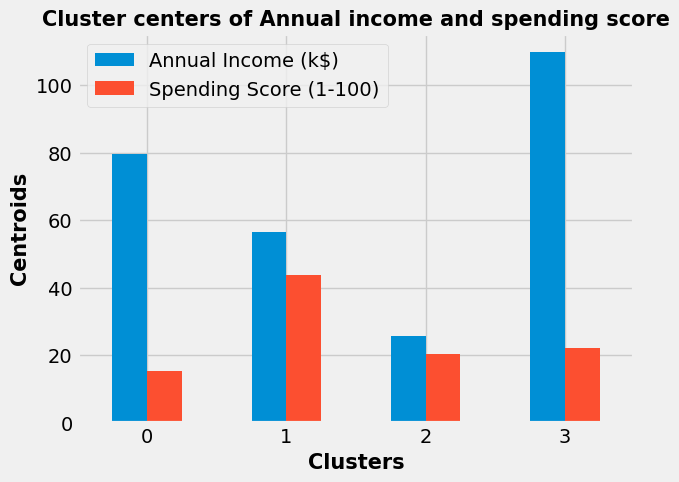

In [71]:
#Let us Visualize the clustering using a bar chat

clus_df.plot.bar()
plt.title("Cluster centers of Annual income and spending score", fontweight='bold', fontsize=15)
plt.xlabel("Clusters", fontweight='bold', fontsize=15)
plt.ylabel("Centroids", fontweight="bold", fontsize=15)
plt.xticks(rotation=0)
plt.show()

## Conclusion: 

We observed that people with high earners spend less at this at this store or business point. It could be that the products on sale are not very appealing to them.

It could also be small business and most favourable to the middle class amongst other reasons one could guess.
